In [1]:
import numpy as np
import pandas as pd
# import easygui as gui
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
%matplotlib



Using matplotlib backend: TkAgg


In [2]:
def dyPlotter(filepath=None,plotFold='/home/subhar/Desktop/MoistureAnalysis-master/fg/',
              dp='/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/',ax=None,plot=True):
    
    '''
    
    '''
    try:
        if filepath is None:
            filepath=gui.fileopenbox(default=dp,filetypes=['*.xls'])
            
#     filepath='/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/2017_08_18/Results2017_08_18.xls'
        df=pd.read_csv(filepath,delimiter='\t')
    
    except IOError:
        print "No file given or ile non existent!!"
        return 
    
#     print filepath
    
    df2=df[['Area1','%Area1','Area2','%Area2','Area3','%Area3','Area4','%Area4','Area5','%Area5']]
    df2.columns=['ROI1','p1','ROI2','p2','ROI3','p3','ROI4','p4','ROI5','p5']

#     df2.head()

    for i in range(1,6):
        df2['x'+str(i)] = df2['p'+str(i)]*df2['ROI'+str(i)]/100
        df2['y'+str(i)] = df2['ROI'+str(i)]-df2['x'+str(i)]
        df2['%dy'+str(i)] = 100*(df2['y'+str(i)][0]-df2['y'+str(i)])/df2['y'+str(i)][0]


    df3=df2[['%dy1','%dy2','%dy3','%dy4','%dy5',]]
    df3.columns=['0%','15%','30%','45%','60%',]
    
    if plot:
        f=df3.plot(figsize=(12,9),ax=ax)
        f.set_xlabel('Time (minutes)',fontsize=20)
        f.set_ylabel('Percentage Area fraction built (%) ',fontsize=20)
        tit=filepath.split('/')[-1].split('.')[0].split('Results')[-1]
        f.set_title(tit)
        plt.savefig(plotFold+filepath.split('/')[-1]+'.png',dpi=300)
    
        return f,df3
        

    else:
        return None,df3
    
# dyPlotter('/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/2017_08_04/Results.xls')
# dyPlotter()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

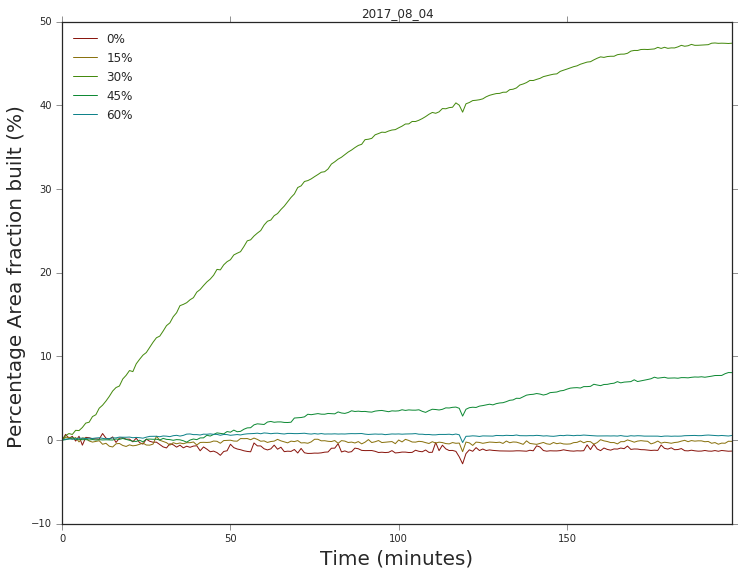

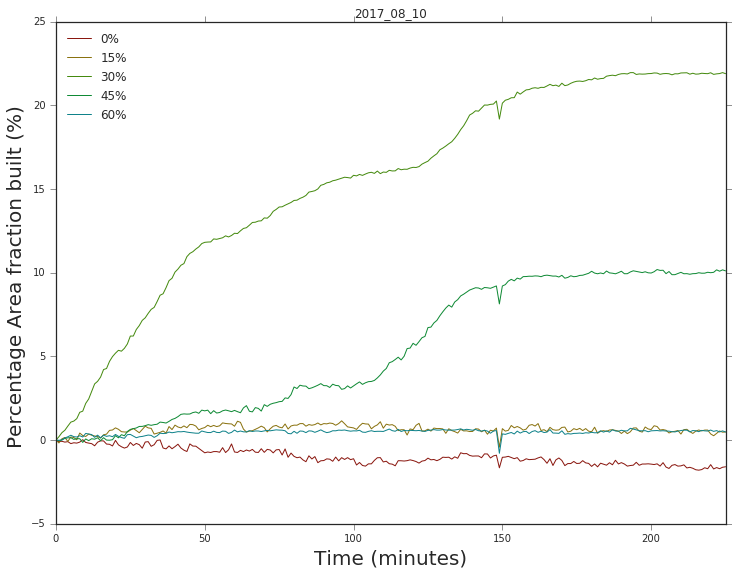

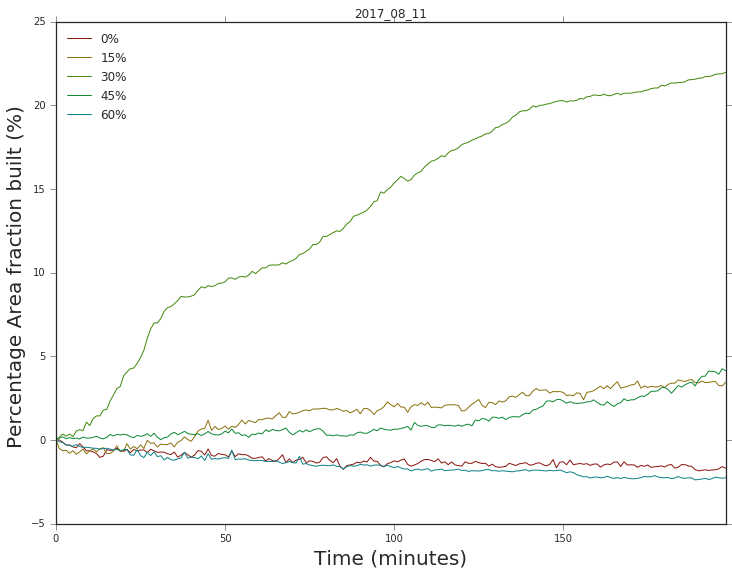

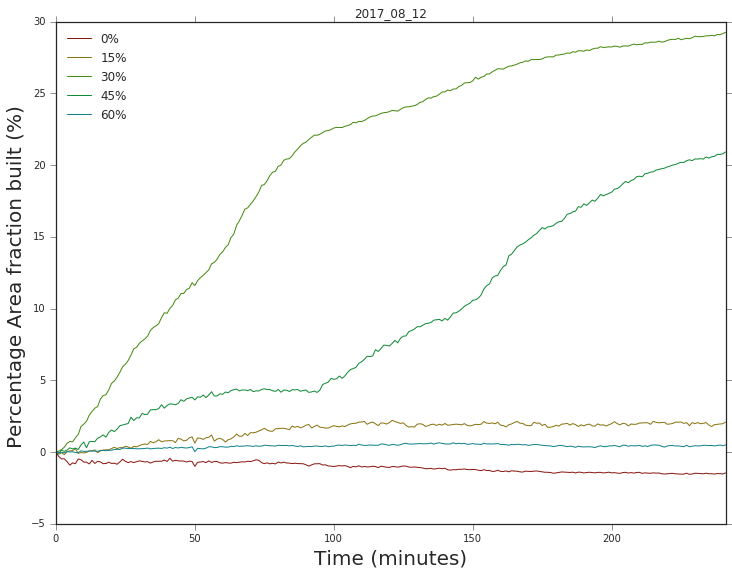

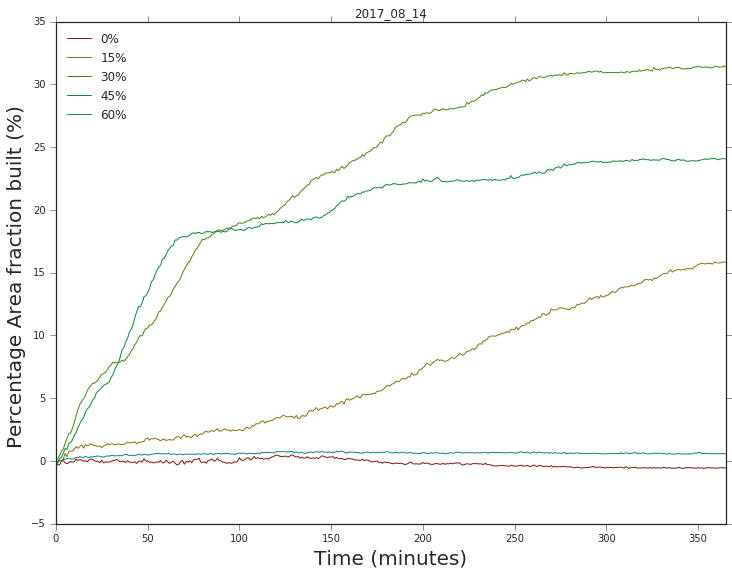

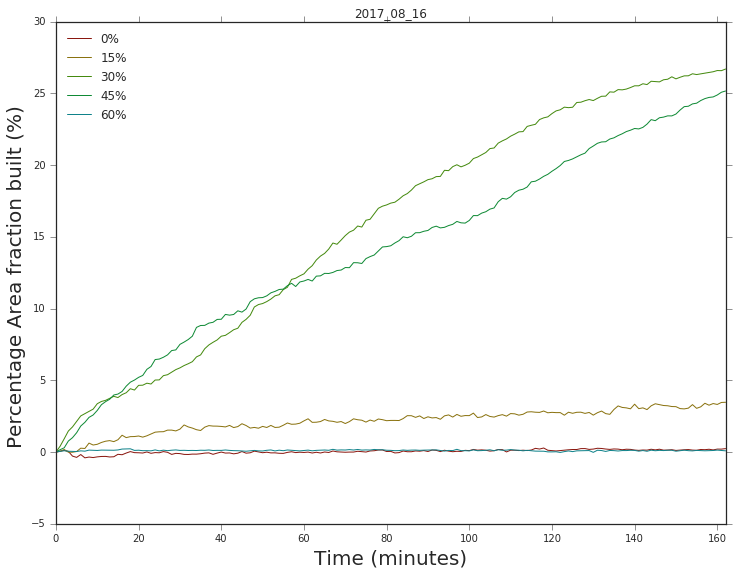

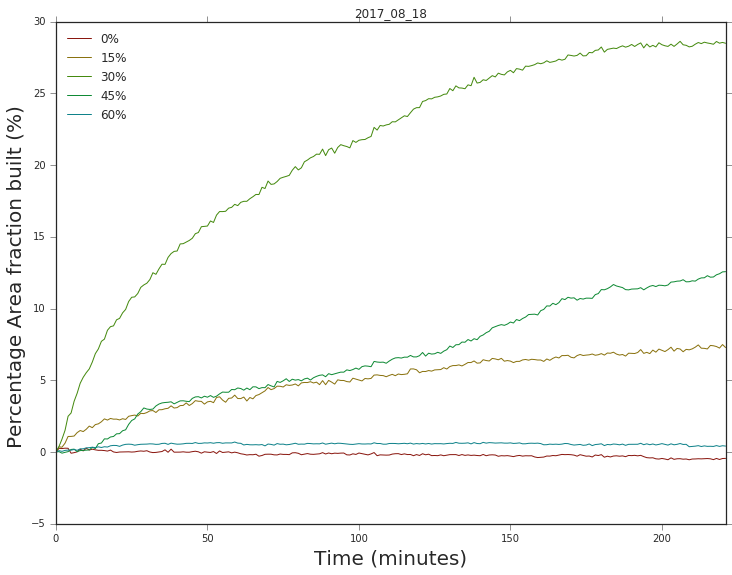

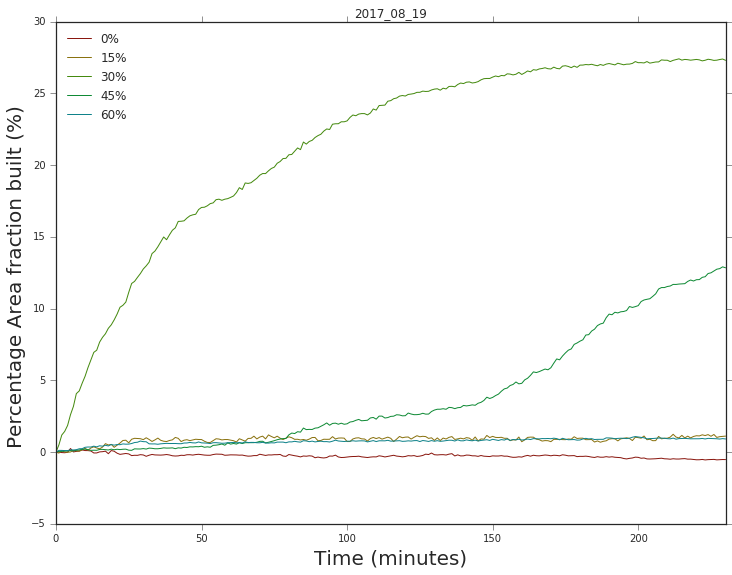

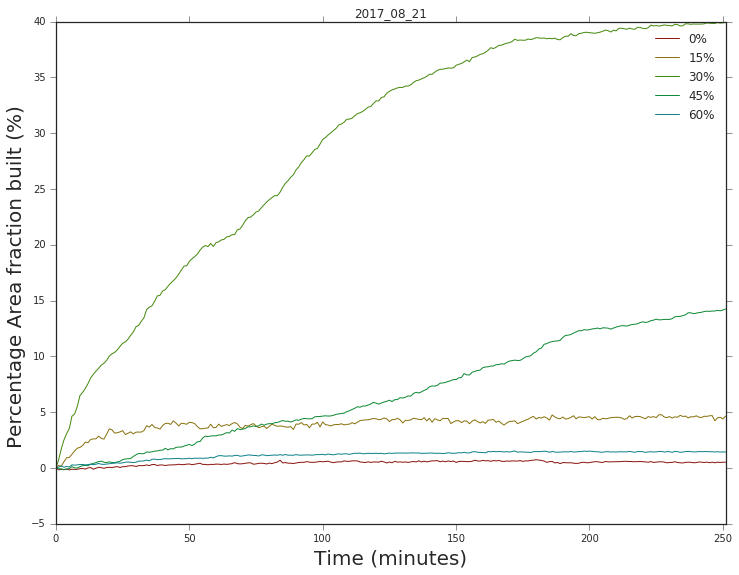

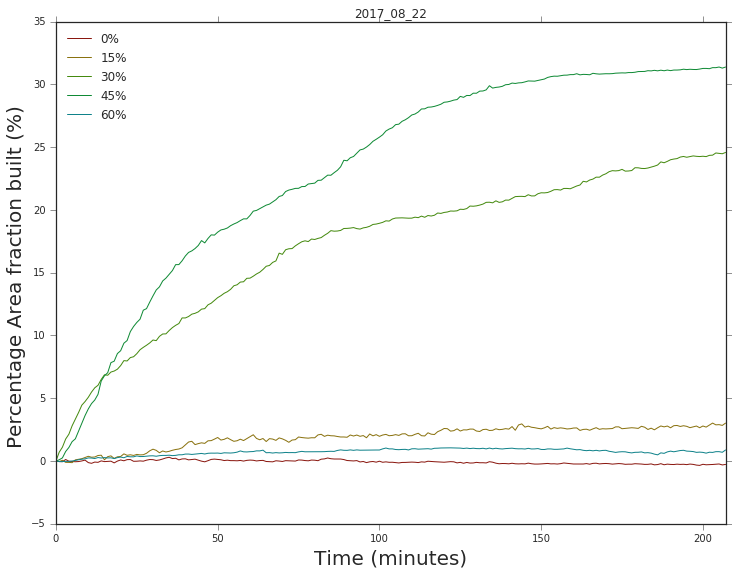

In [251]:
#gui to select all xl files

#xlFilePaths=gui.fileopenbox(default='/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/',multiple=True)
xlFilePaths=['/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/xl/Results2017_08_04.xls', '/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/xl/Results2017_08_10.xls', '/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/xl/Results2017_08_11.xls', '/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/xl/Results2017_08_12.xls', '/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/xl/Results2017_08_14.xls', '/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/xl/Results2017_08_16.xls', '/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/xl/Results2017_08_18.xls', '/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/xl/Results2017_08_19.xls', '/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/xl/Results2017_08_21.xls', '/home/subhar/Desktop/data_acquisition/Mound_E/0-60%/new_setup_ completeBlack/xl/Results2017_08_22.xls']


#start  with a blank list 
lastL=[]

#steady state value to plot
steadyRow=160
sns.set_palette(sns.hls_palette(8, l=0.3, s=0.8))

#iterate through all files
for filename in xlFilePaths:
    
    #get the dataframe of the current xl, plot=False to prevent plotting and wasting time
    p,d=dyPlotter(filename,plot=True)
        

    #steadyRow to pull out
    last=d.iloc[steadyRow,:]
    
#     print ('\n{} is {} items long').format(filename,len(d))
    
    #concatenate after the first file
    if len(lastL) ==0:  
        lastL=last.to_frame()
    else:
        lastL=pd.concat([lastL,last],axis=1)

#transpose, reset index to have nice row numbers, remove the new redundant first column
lastL2=lastL.T.reset_index().drop('index',axis=1)

#dump it to csv for easy acesss next time
lastL2.to_csv('lastL.csv')


In [3]:
#load it from csv to save time
lastL=pd.read_csv('lastL.csv').drop('Unnamed: 0',axis=1)

lastL


,0%,15%,30%,45%,60%
0,-1.259109,0.049535,45.787638,6.505109,0.496973
1,-1.155539,0.928519,21.019632,9.786118,0.511904
2,-1.428471,3.089191,20.595190,2.260661,-2.206689
3,-1.343117,1.872857,26.704050,12.658871,0.530104
4,0.188734,4.845304,23.770087,20.989863,0.710978
5,0.206353,3.318496,26.589271,24.885784,0.135469
6,-0.369708,6.416528,27.063918,9.854348,0.590699
7,-0.351068,0.720411,26.315789,4.789420,0.837789
8,0.682355,4.149573,37.123679,8.987352,1.391103
9,-0.236932,2.627883,21.796606,30.778340,0.934606


In [8]:
#set style and palatte to make it pretty
sns.set_style("ticks")
# sns.set_palette(sns.hls_palette(8, l=0.7, s=.4))
# sns.set_palette(sns.cubehelix_palette(8, start=.1, rot=-.75))
sns.set_palette('plasma_r')

plt.figure(figsize=[18,18])
#plot the boxplot
ax = sns.boxplot(data=lastL,width=0.35,saturation=0.5,linewidth=1)
sns.despine(offset=0, trim=True);

#overlay the individual data points
ax = sns.swarmplot(data=lastL, color="0.5",linewidth=0.5) # color = 0.25- dark grey, 0-complete black, 1- complete white

#ax = sns.swarmplot(data=lastL,hue= Trials, palette="Set2" )
#sns.swarmplot( hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)

#set labels
ax.set_xlabel('Soil Moisture (w/w %)',fontsize=24)
ax.set_ylabel('Percentage Area built after 160 min (%)',fontsize=24)
# ax.set_title('Effect of soil moisture on building',fontsize=18)

#save and show
plt.savefig('moistureSteadyPlot2.png',dpi=300,transparent = True)
plt.savefig('moistureSteadyPlot2.svg',dpi=300,transparent = True)
plt.show()

In [238]:
lastL


,0%,15%,30%,45%,60%
0,-1.259109,0.049535,45.787638,6.505109,0.496973
1,-1.155539,0.928519,21.019632,9.786118,0.511904
2,-1.428471,3.089191,20.595190,2.260661,-2.206689
3,-1.343117,1.872857,26.704050,12.658871,0.530104
4,0.188734,4.845304,23.770087,20.989863,0.710978
5,0.206353,3.318496,26.589271,24.885784,0.135469
6,-0.369708,6.416528,27.063918,9.854348,0.590699
7,-0.351068,0.720411,26.315789,4.789420,0.837789
8,0.682355,4.149573,37.123679,8.987352,1.391103
9,-0.236932,2.627883,21.796606,30.778340,0.934606


In [ ]:
dfg=lastL.T.reset_index().reset_index().drop('index',axis=1)
#dfg.rename(columns={'level_0':'trial'}, inplace=True)
sns.set_style("whitegrid")
sns.set_style("ticks")

sns.set_palette(sns.hls_palette(8, l=.8, s=.4))
#sns.set_palette('viridis_r')
ax=sns.boxplot(data=dfg)
ax = sns.swarmplot(data=dfg, color=".25")
ax.set_xlabel='Soil Humidity (%)'
plt.show()

In [ ]:
ls

In [ ]:
# sns.set_2style("whitegrid")
sns.set_style("ticks")

sns.set_palette(sns.hls_palette(8, l=.8, s=.4))
# sns.set_palette('viridis_r')
ax=sns.boxplot(data=dfg)
ax = sns.swarmplot(data=dfg, color=".25")
ax.set_xlabel='Soil Humidity (%)'
plt.show()

In [ ]:
dfgh=pd.melt(dfg,['trial'])

In [ ]:
dfgh

In [ ]:
sns.set_palette(sns.hls_palette(8, l=.3, s=.5))

ax=sns.boxplot(data=dfgh,x='variable',y='value',)
sns.set_palette('viridis')

ax=sns.swarmplot(data=dfgh,x='variable',y='value',hue='trial')

#ax = sns.swarmplot(data=dfg, color=".25",hue='trial')


In [ ]:
b=d.iloc[-1,:]
pd.concat([b,b],axis=1).T

In [144]:
pd.concat([[],b],axis=1).T


TypeError: cannot concatenate a non-NDFrame object